<a href="https://colab.research.google.com/github/Sazim2019331087/DSP-Lab-Work/blob/main/DSP_Lab_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Sinusoidal Wave

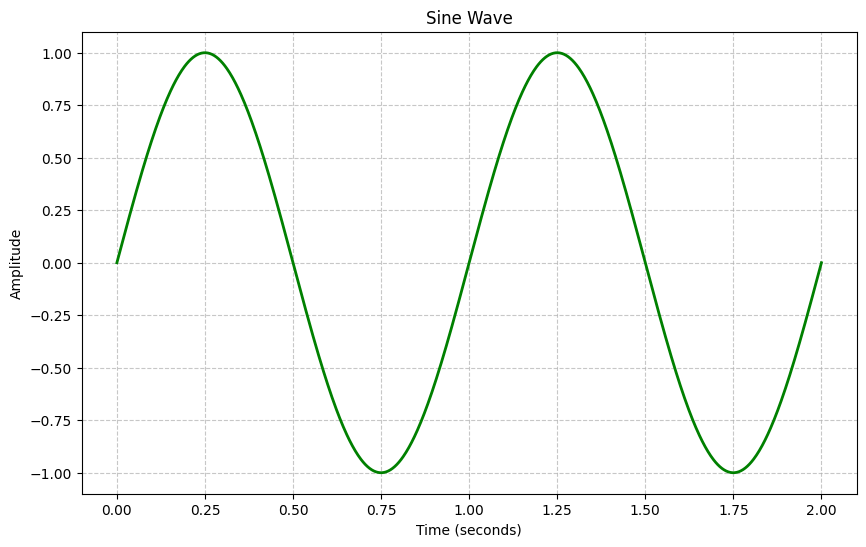

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def create_sine_wave(amplitude=1, frequency=1, duration=2, sample_rate=1000):
    time = np.linspace(0, duration, sample_rate)
    signal = amplitude * np.sin(2 * np.pi * frequency * time)
    return time, signal

time_values, sine_wave = create_sine_wave()

plt.figure(figsize=(10, 6))
plt.plot(time_values, sine_wave, color='green', linewidth=2)
plt.title('Sine Wave')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.show()


# 2. Simple Signal

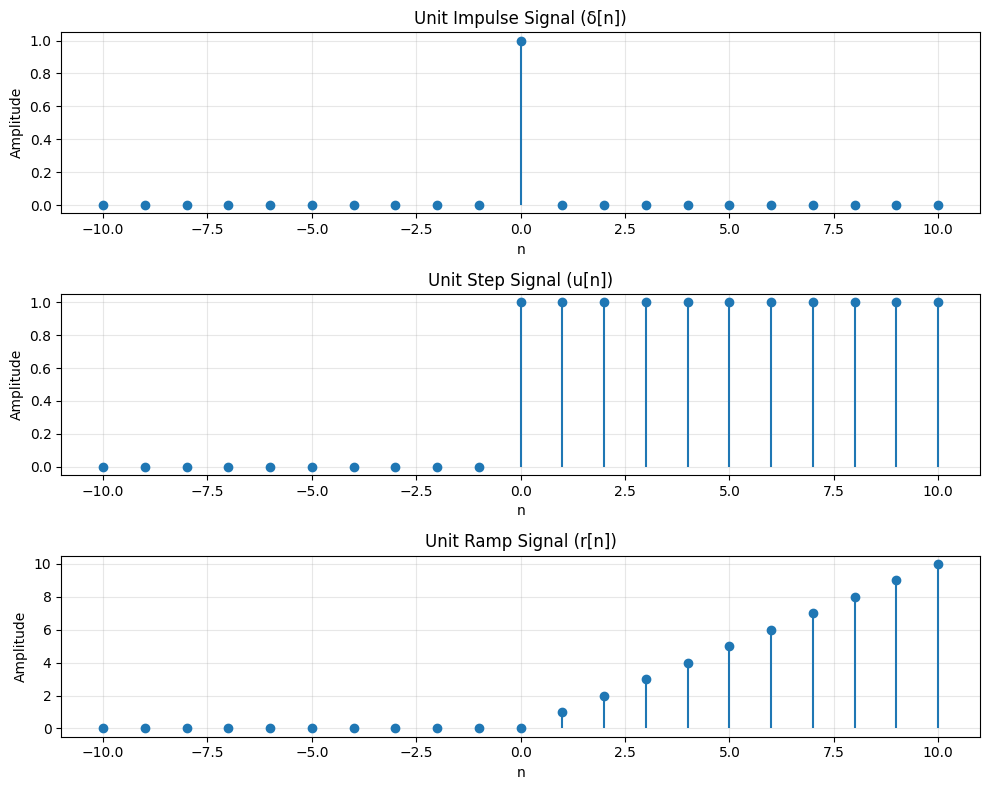

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def create_unit_impulse(index_range):
    return np.where(index_range == 0, 1, 0)

def create_unit_step(index_range):
    return np.where(index_range >= 0, 1, 0)

def create_unit_ramp(index_range):
    return np.where(index_range >= 0, index_range, 0)

def plot_discrete(ax, index_range, signal_data, title):
    ax.stem(index_range, signal_data, basefmt=" ")
    ax.set_title(title)
    ax.set_xlabel('n')
    ax.set_ylabel('Amplitude')
    ax.grid(alpha=0.3)

index_range = np.arange(-10, 11)


impulse_signal = create_unit_impulse(index_range)
step_signal = create_unit_step(index_range)
ramp_signal = create_unit_ramp(index_range)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))


plot_discrete(ax1, index_range, impulse_signal, 'Unit Impulse Signal (δ[n])')
plot_discrete(ax2, index_range, step_signal, 'Unit Step Signal (u[n])')
plot_discrete(ax3, index_range, ramp_signal, 'Unit Ramp Signal (r[n])')

plt.tight_layout()
plt.show()


# 3. Composite Signal

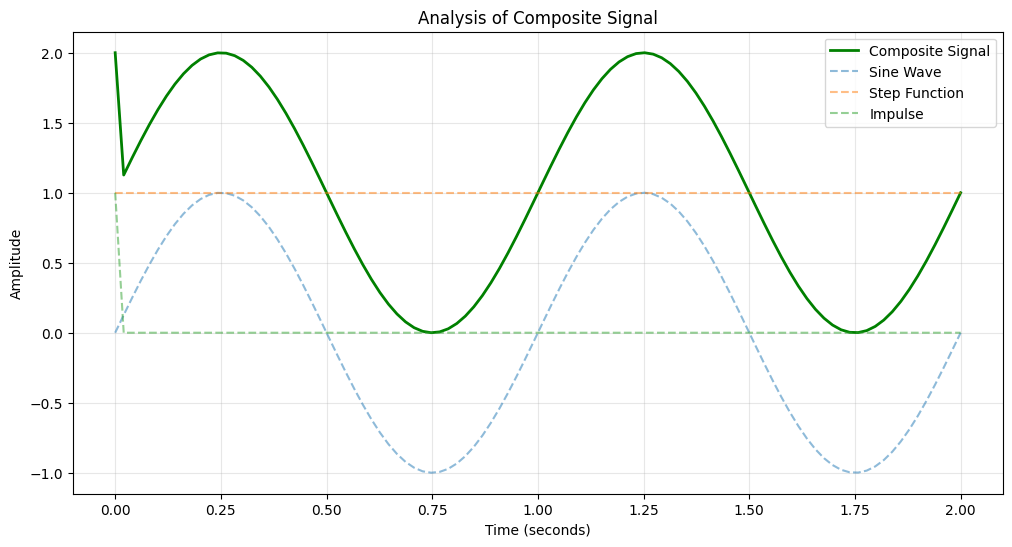

In [10]:
import numpy as np
import matplotlib.pyplot as plt

class SignalCreator:
    def __init__(self, start_time=0, end_time=2, sample_points=100):
        self.time = np.linspace(start_time, end_time, sample_points)

    def generate_sine_wave(self, amplitude=1, frequency=1):
        return amplitude * np.sin(2 * np.pi * frequency * self.time)

    def generate_step_function(self):
        return np.heaviside(self.time, 1)

    def generate_impulse_function(self):
        return np.where(np.abs(self.time) < 1e-10, 1, 0)

    def create_composite_signal(self):
        return (self.generate_sine_wave() +
                self.generate_step_function() +
                self.generate_impulse_function())

def visualize_signals(time, composite_signal, individual_signals=None):
    plt.figure(figsize=(12, 6))
    plt.plot(time, composite_signal, color='green', label='Composite Signal', linewidth=2)

    if individual_signals:
        for signal_name, signal_data in individual_signals.items():
            plt.plot(time, signal_data, linestyle='--', label=signal_name, alpha=0.5)

    plt.title('Analysis of Composite Signal')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.grid(alpha=0.3)
    plt.legend()
    plt.show()


signal_creator = SignalCreator()
composite_signal = signal_creator.create_composite_signal()


signal_components = {
    'Sine Wave': signal_creator.generate_sine_wave(),
    'Step Function': signal_creator.generate_step_function(),
    'Impulse': signal_creator.generate_impulse_function()
}

visualize_signals(signal_creator.time, composite_signal, signal_components)


# 4. Voice Record

Creating sample signal...
Sample signal created!


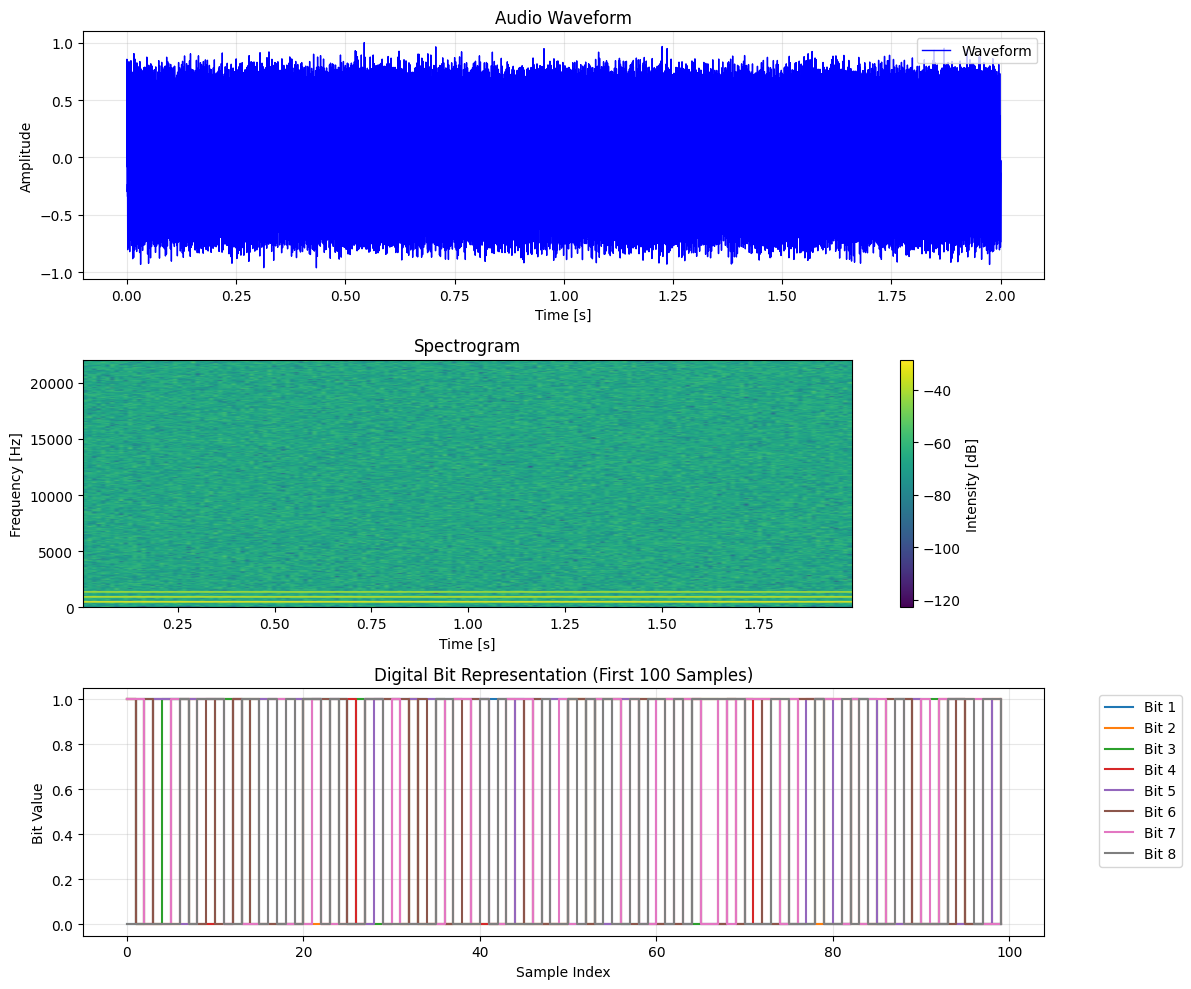

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
from typing import List, Tuple

@dataclass
class AudioSettings:
    duration: float = 5
    sample_rate: int = 44100
    bit_depth: int = 8

class AudioHandler:
    def __init__(self, settings: AudioSettings):
        self.settings = settings
        self.signal = None
        self.binary_representation = None

    def create_sample_signal(self) -> np.ndarray:
        print("Creating sample signal...")
        time = np.linspace(0, self.settings.duration, int(self.settings.duration * self.settings.sample_rate))


        freq1, freq2, freq3 = 440, 880, 1320
        signal = (
            0.5 * np.sin(2 * np.pi * freq1 * time) +
            0.3 * np.sin(2 * np.pi * freq2 * time) +
            0.2 * np.sin(2 * np.pi * freq3 * time)
        )

        noise = np.random.normal(0, 0.1, len(time))
        signal += noise

        signal /= np.max(np.abs(signal))

        self.signal = signal
        print("Sample signal created!")
        return self.signal

    def quantize_signal(self) -> np.ndarray:
        if self.signal is None:
            raise ValueError("No signal available to quantize")

        normalized_signal = np.clip(self.signal, -1, 1)
        max_value = 2 ** (self.settings.bit_depth - 1) - 1
        quantized = ((normalized_signal + 1) * max_value).astype(int)

        self.binary_representation = np.array([
            f"{sample:0{self.settings.bit_depth}b}"
            for sample in quantized
        ])
        return self.binary_representation

    def display_visualization(self):
        if self.signal is None:
            raise ValueError("No signal available for visualization")

        time_axis = np.linspace(0, self.settings.duration, len(self.signal))

        fig, (waveform_ax, spectrogram_ax, bits_ax) = plt.subplots(3, 1, figsize=(12, 10))

        waveform_ax.plot(time_axis, self.signal, color='blue', label='Waveform', linewidth=1)
        waveform_ax.set_title('Audio Waveform')
        waveform_ax.set_xlabel('Time [s]')
        waveform_ax.set_ylabel('Amplitude')
        waveform_ax.grid(alpha=0.3)
        waveform_ax.legend()

        spectrogram, freqs, t, im = spectrogram_ax.specgram(
            self.signal,
            NFFT=1024,
            Fs=self.settings.sample_rate,
            noverlap=512,
            cmap='viridis'
        )
        spectrogram_ax.set_title('Spectrogram')
        spectrogram_ax.set_xlabel('Time [s]')
        spectrogram_ax.set_ylabel('Frequency [Hz]')
        plt.colorbar(im, ax=spectrogram_ax, label='Intensity [dB]')

        if self.binary_representation is None:
            self.quantize_signal()

        sample_indices = np.arange(min(100, len(self.binary_representation)))
        for bit_index in range(self.settings.bit_depth):
            bit_values = [int(binary[bit_index]) for binary in self.binary_representation[:100]]
            bits_ax.step(
                sample_indices,
                bit_values,
                label=f'Bit {bit_index + 1}',
                where='post'
            )

        bits_ax.set_title('Digital Bit Representation (First 100 Samples)')
        bits_ax.set_xlabel('Sample Index')
        bits_ax.set_ylabel('Bit Value')
        bits_ax.grid(alpha=0.3)
        bits_ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

        plt.tight_layout()
        plt.show()

def main():
    settings = AudioSettings(duration=2)
    handler = AudioHandler(settings)

    handler.create_sample_signal()
    handler.display_visualization()

if __name__ == "__main__":
    main()


# 5. Shifting Operation

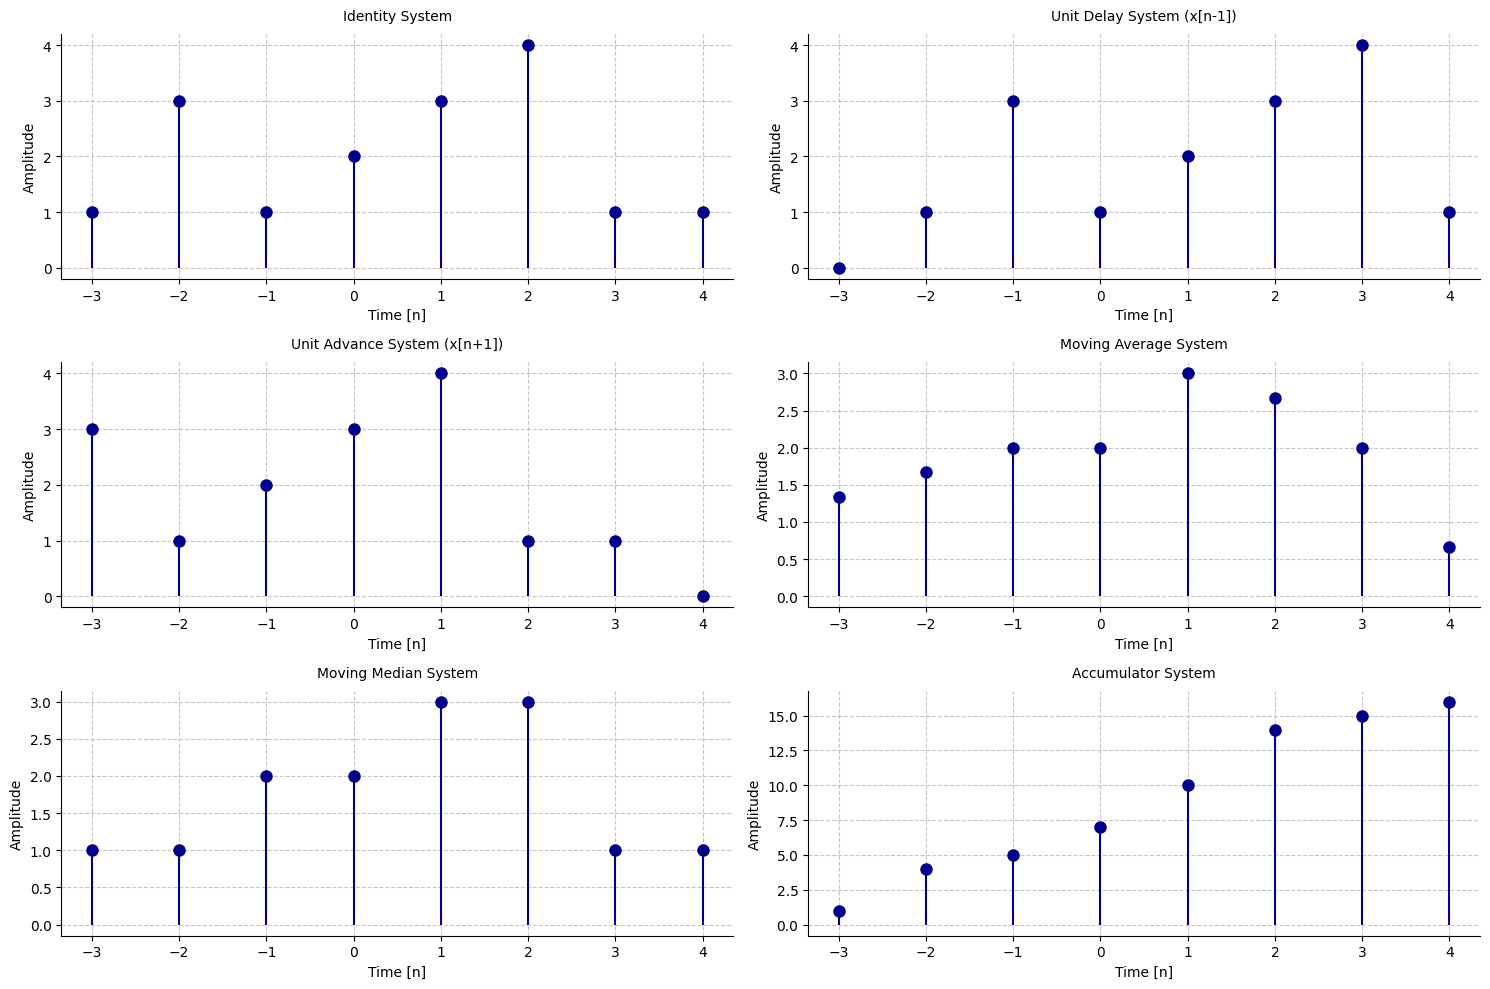

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod
from typing import List, Tuple

class AbstractSignalProcessor(ABC):
    @abstractmethod
    def process(self, x: np.ndarray) -> np.ndarray:
        pass

    @property
    @abstractmethod
    def name(self) -> str:
        pass

class IdentityProcessor(AbstractSignalProcessor):
    def process(self, x: np.ndarray) -> np.ndarray:
        return x

    @property
    def name(self) -> str:
        return "Identity System"

class DelayedSignal(AbstractSignalProcessor):
    def process(self, x: np.ndarray) -> np.ndarray:
        return np.concatenate([[0], x[:-1]])

    @property
    def name(self) -> str:
        return "Unit Delay System (x[n-1])"

class AdvancedSignal(AbstractSignalProcessor):
    def process(self, x: np.ndarray) -> np.ndarray:
        return np.concatenate([x[1:], [0]])

    @property
    def name(self) -> str:
        return "Unit Advance System (x[n+1])"

class MovingAverageProcessor(AbstractSignalProcessor):
    def process(self, x: np.ndarray) -> np.ndarray:
        result = np.zeros_like(x, dtype=float)
        padded = np.pad(x, (1, 1), mode='constant')
        for i in range(len(x)):
            result[i] = np.mean(padded[i:i+3])
        return result

    @property
    def name(self) -> str:
        return "Moving Average System"

class MovingMedianProcessor(AbstractSignalProcessor):
    def process(self, x: np.ndarray) -> np.ndarray:
        result = np.zeros_like(x, dtype=float)
        padded = np.pad(x, (1, 1), mode='constant')
        for i in range(len(x)):
            result[i] = np.median(padded[i:i+3])
        return result

    @property
    def name(self) -> str:
        return "Moving Median System"

class AccumulatorProcessor(AbstractSignalProcessor):
    def process(self, x: np.ndarray) -> np.ndarray:
        return np.cumsum(x)

    @property
    def name(self) -> str:
        return "Accumulator System"

class SignalPlotter:
    def __init__(self, signal: np.ndarray, time: np.ndarray):
        self.signal = signal
        self.time = time
        self.processors: List[AbstractSignalProcessor] = [
            IdentityProcessor(),
            DelayedSignal(),
            AdvancedSignal(),
            MovingAverageProcessor(),
            MovingMedianProcessor(),
            AccumulatorProcessor()
        ]

    def display_all_systems(self):
        fig = plt.figure(figsize=(15, 10))

        for index, processor in enumerate(self.processors, start=1):
            ax = plt.subplot(3, 2, index)
            processed_signal = processor.process(self.signal)

            markerline, stemlines, baseline = ax.stem(
                self.time,
                processed_signal,
                basefmt=" "
            )
            plt.setp(markerline, 'color', 'darkblue', 'markersize', 8)
            plt.setp(stemlines, 'color', 'darkblue', 'linewidth', 1.5)

            ax.set_title(processor.name, pad=10, fontsize=10)
            ax.set_xlabel('Time [n]')
            ax.set_ylabel('Amplitude')
            ax.grid(True, linestyle='--', alpha=0.7)
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)

        plt.tight_layout()
        plt.show()

def main():
    signal = np.array([1, 3, 1, 2, 3, 4, 1, 1])
    time = np.array([-3, -2, -1, 0, 1, 2, 3, 4])

    plotter = SignalPlotter(signal, time)
    plotter.display_all_systems()

if __name__ == "__main__":
    main()


# 6. Convolution Sum

Input signal x[n]: [1 2 3]
Impulse response h[n]: [ 1 -1  2]
Convolution result y[n]: [ 2.  3.  5. -1.  3.]


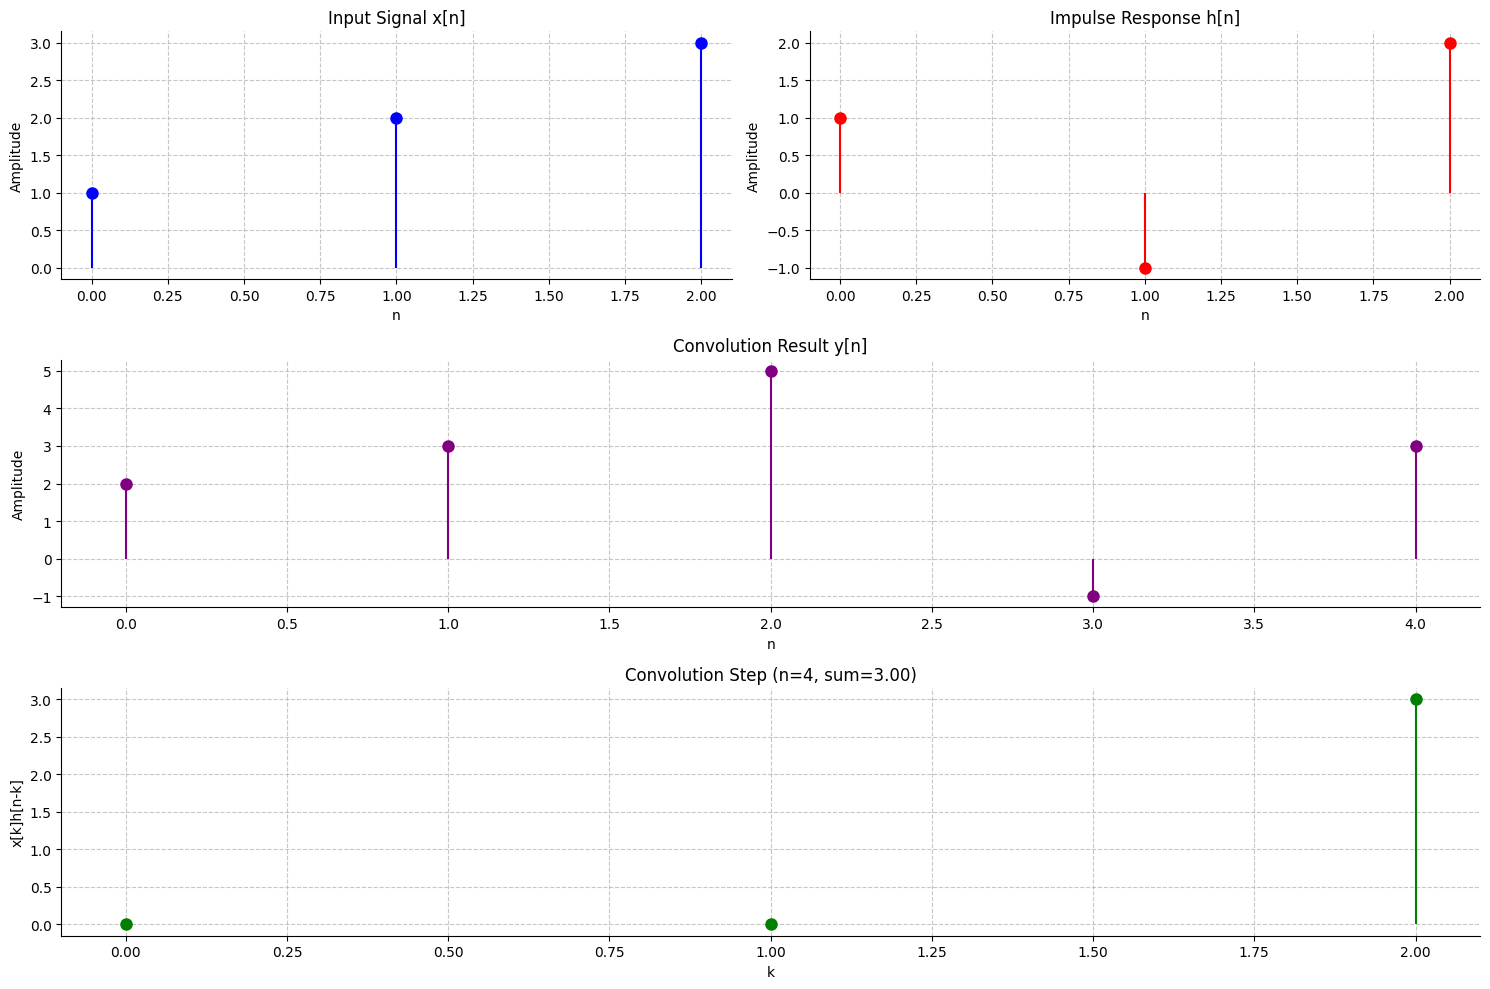

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
from typing import List, Tuple

@dataclass
class Signal:
    values: np.ndarray
    name: str
    color: str = 'blue'

    @property
    def length(self) -> int:
        return len(self.values)

    def plot(self, ax: plt.Axes, offset: int = 0):
        n = np.arange(offset, offset + self.length)
        markerline, stemlines, baseline = ax.stem(
            n, self.values, basefmt=" ", label=self.name
        )
        plt.setp(markerline, color=self.color, markersize=8)
        plt.setp(stemlines, color=self.color, linewidth=1.5)
        ax.set_title(self.name)
        ax.set_xlabel('n')
        ax.set_ylabel('Amplitude')
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

class ConvolutionProcessor:
    def __init__(self, x: Signal, h: Signal):
        self.x = x
        self.h = h
        self.y = None
        self.steps = []

    def fold_signal(self, signal: np.ndarray) -> np.ndarray:
        return np.flip(signal)

    def convolve(self) -> Signal:
        h_reversed = self.fold_signal(self.h.values)
        output_length = self.x.length + self.h.length - 1
        output_values = np.zeros(output_length)
        self.steps = []

        for n in range(output_length):
            intermediate_values = np.zeros(self.x.length)
            cumulative_sum = 0
            for k in range(self.x.length):
                if 0 <= n - k < self.h.length:
                    contribution = self.x.values[k] * h_reversed[n - k]
                    intermediate_values[k] = contribution
                    cumulative_sum += contribution
            output_values[n] = cumulative_sum
            self.steps.append((n, intermediate_values.copy(), cumulative_sum))

        self.y = Signal(output_values, "Convolution Result y[n]", 'purple')
        return self.y

    def plot_results(self, show_steps: bool = False):
        if self.y is None:
            self.convolve()

        if show_steps:
            fig = plt.figure(figsize=(15, 10))
            gs = plt.GridSpec(3, 2)

            ax1 = fig.add_subplot(gs[0, 0])
            self.x.plot(ax1)

            ax2 = fig.add_subplot(gs[0, 1])
            self.h.plot(ax2)

            ax3 = fig.add_subplot(gs[1, :])
            self.y.plot(ax3)

            ax4 = fig.add_subplot(gs[2, :])
            self._plot_intermediate_steps(ax4)
        else:
            fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))
            self.x.plot(ax1)
            self.h.plot(ax2)
            self.y.plot(ax3)

        plt.tight_layout()
        plt.show()

    def _plot_intermediate_steps(self, ax: plt.Axes):
        n, values, total = self.steps[-1]
        markerline, stemlines, baseline = ax.stem(
            range(len(values)), values, basefmt=" ", label=f"Step n={n}"
        )
        plt.setp(markerline, color='green', markersize=8)
        plt.setp(stemlines, color='green', linewidth=1.5)
        ax.set_title(f"Convolution Step (n={n}, sum={total:.2f})")
        ax.set_xlabel('k')
        ax.set_ylabel('x[k]h[n-k]')
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

def main():
    x_values = np.array([1, 2, 3])
    h_values = np.array([1, -1, 2])

    x = Signal(x_values, "Input Signal x[n]", 'blue')
    h = Signal(h_values, "Impulse Response h[n]", 'red')

    processor = ConvolutionProcessor(x, h)
    y = processor.convolve()

    print(f"Input signal x[n]: {x.values}")
    print(f"Impulse response h[n]: {h.values}")
    print(f"Convolution result y[n]: {y.values}")

    processor.plot_results(show_steps=True)

if __name__ == "__main__":
    main()
